In [1]:
from src.tools import Observation
import os
import pandas as pd
import numpy as np

statistics in 70-370 keV for a GRB_Fermi at 2022-08-26 10:21:19.720000:
peak time [utc]: 2022-08-26 10:21:20.400468
SNR at peak: 8.08173733192529
count rate [cnt/s] above background at peak: 98.20779651312495
T90 [s]: 18
SNR in T90: 4.7230458768435115
counts above background in T90: 243.4545755918748

statistics in 70-890 keV for a GRB_Fermi at 2022-08-26 10:21:19.720000:
peak time [utc]: 2022-08-26 10:21:20.400468
SNR at peak: 6.897450029587445
count rate [cnt/s] above background at peak: 109.05826070346052
T90 [s]: 18
SNR in T90: 4.033202102315113
counts above background in T90: 278.40782492422386



c:\Users\maria\Desktop\CubeSats\grbalpha-tools\src\tools.py:252: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
c:\Users\maria\Desktop\CubeSats\grbalpha-tools\src\tools.py:263: FutureWarning: Passing method to DatetimeIndex.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  time_index = self.longitude.index[self.longitude.index.get_loc(event_time,method='nearest')]
c:\Users\maria\Desktop\CubeSats\grbalpha-tools\src\tools.py:320: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


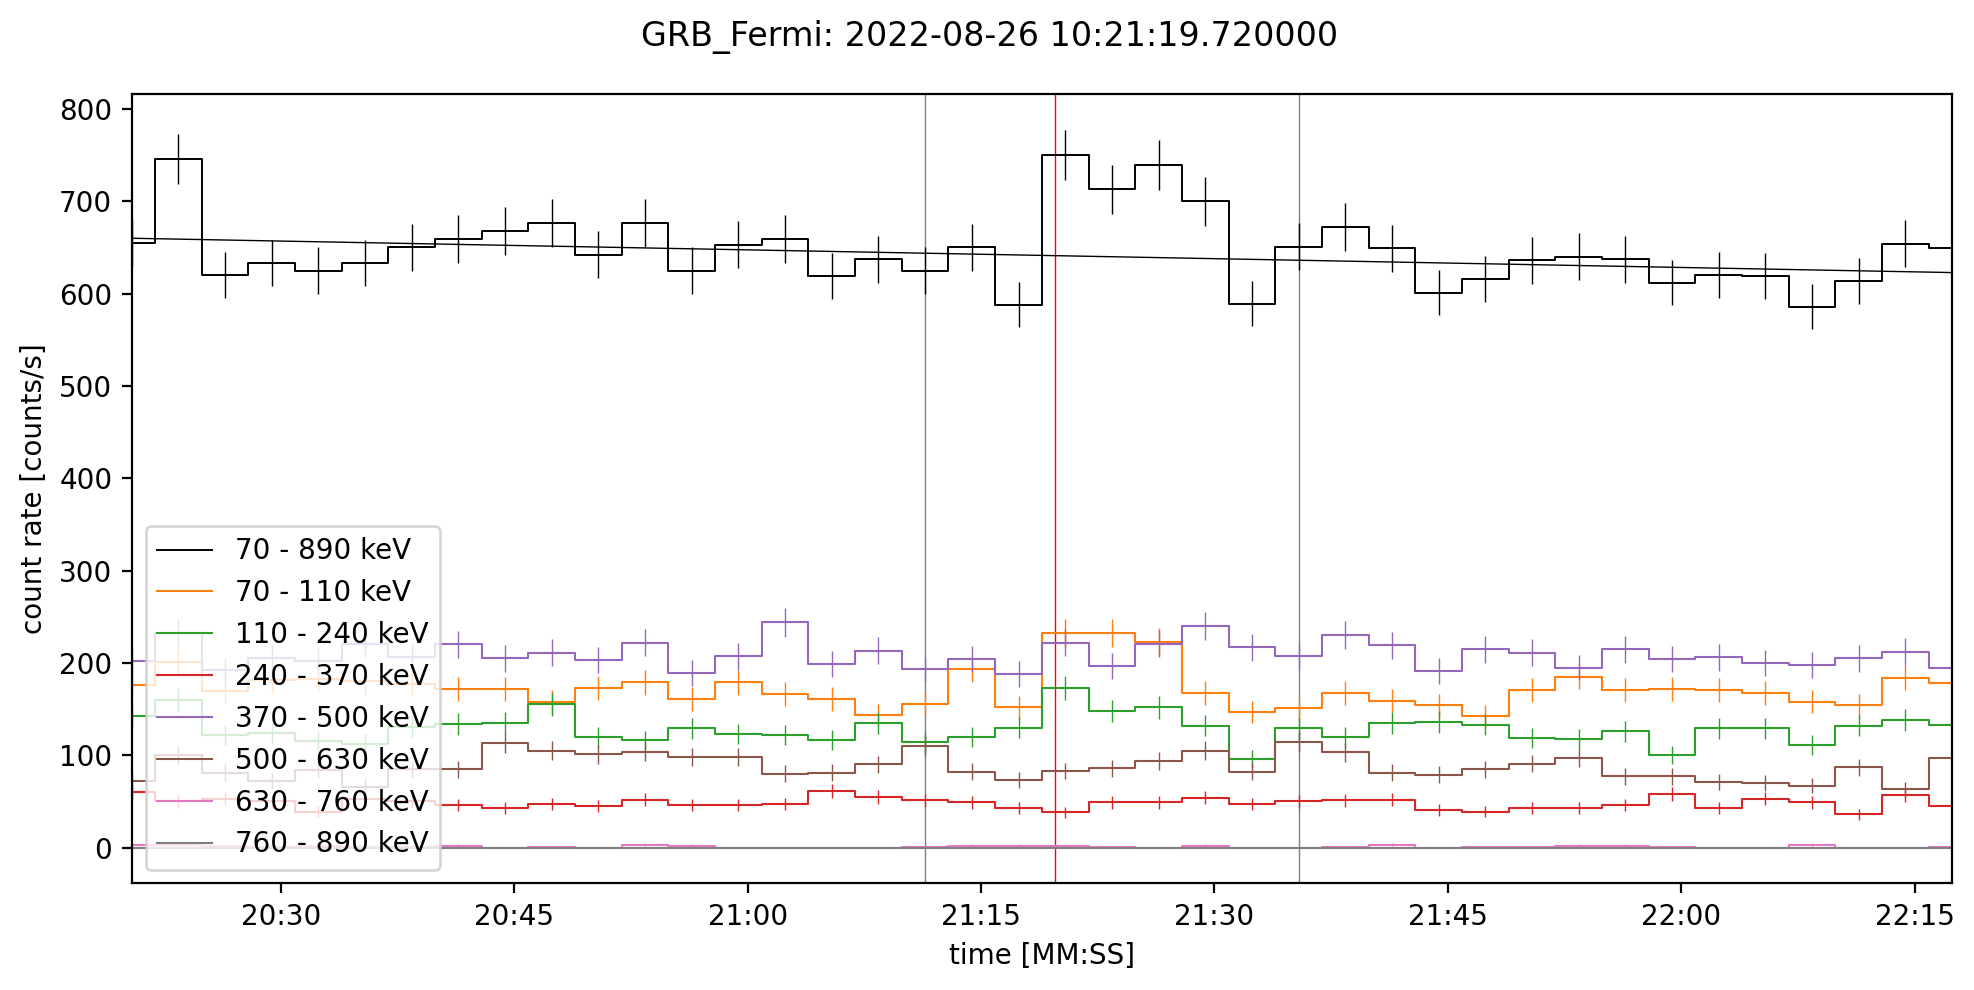

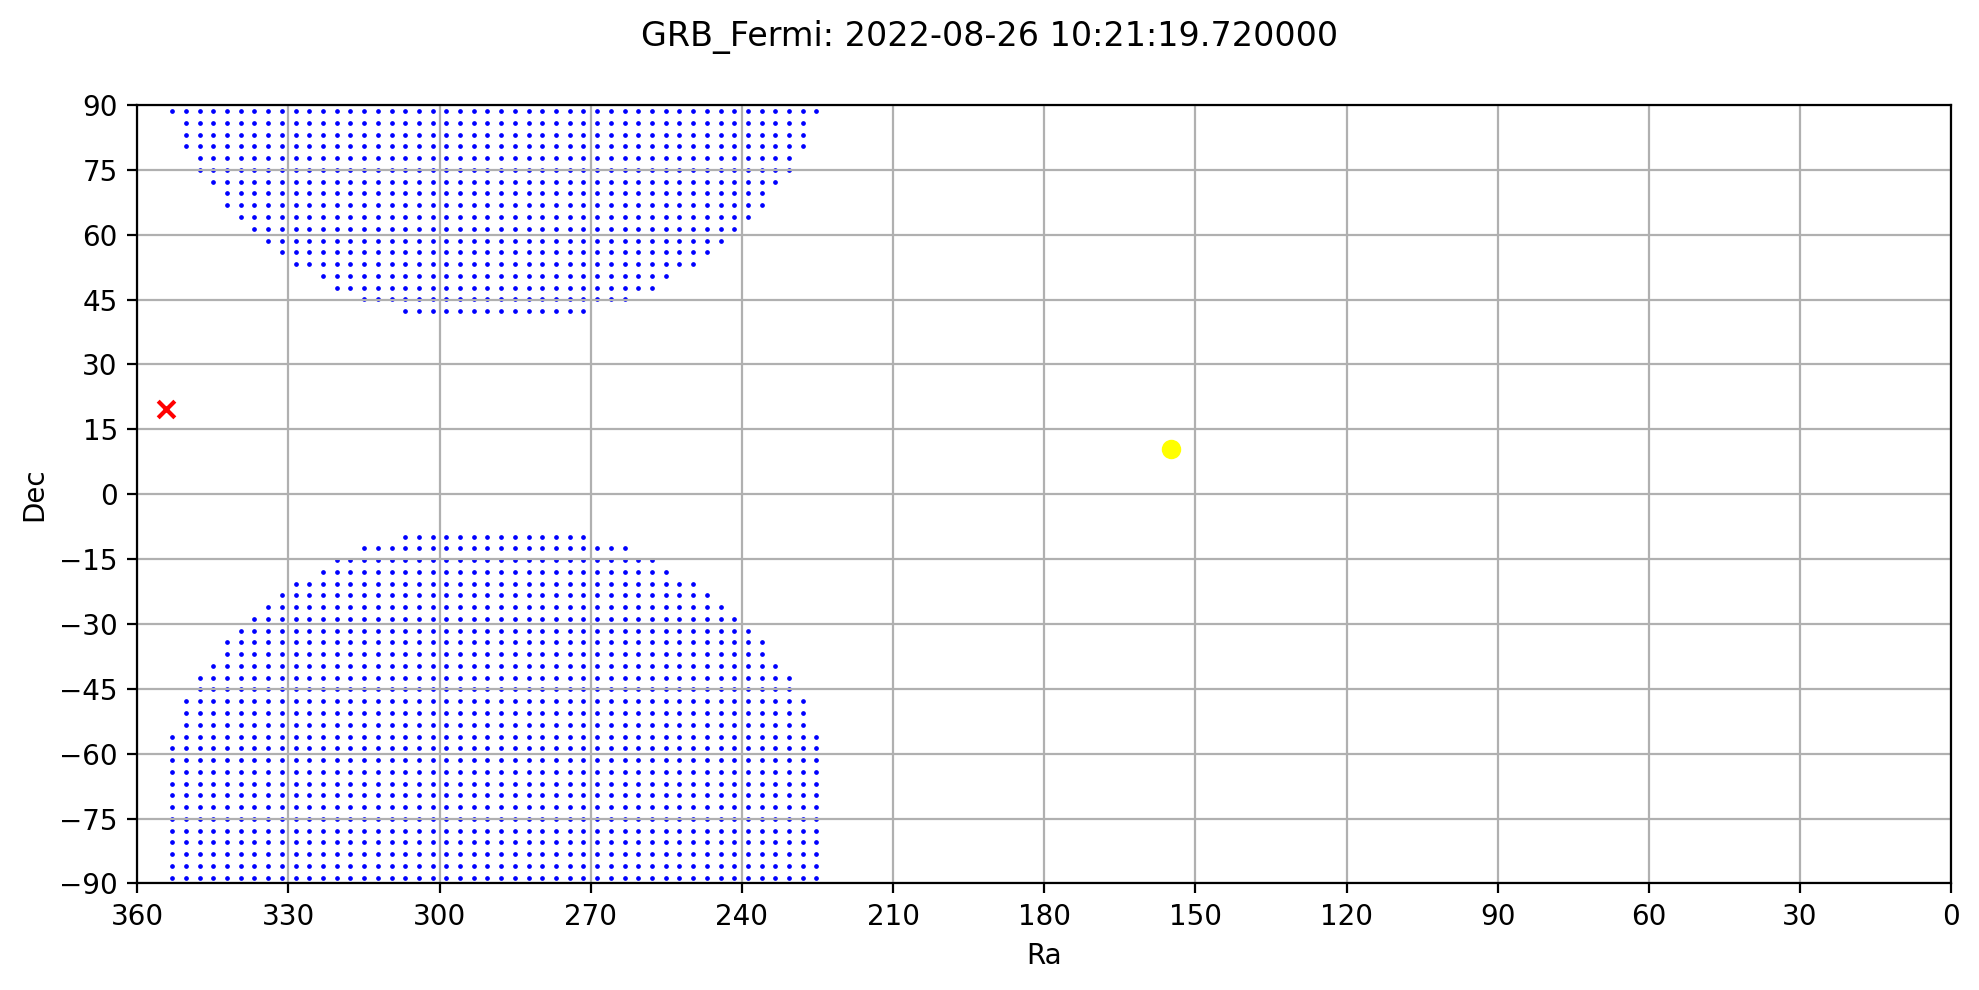

In [2]:
df = pd.read_csv(r"C:\Users\maria\Desktop\CubeSats\trigger_file_list.csv")
path = r"C:\\Users\\maria\\Desktop\\CubeSats\\GRBs\\files\\"
n = 0
time,mission,filename,ra,dec = df.time[n],df.mission[n],df.filename[n],df.ra[n],df.dec[n]
obs = Observation(path+filename)
obs.check_event(time,'GRB_'+mission,llim=3,rlim=5,dtvalue=1,fit_function='linear')
obs.plot_skymap(time,'GRB_'+mission,ra,dec)

In [3]:
i = pd.to_datetime(time).round('ms')
obs.longitude.index[obs.longitude.index.get_loc(i,method='nearest')]

C:\Users\maria\AppData\Local\Temp\ipykernel_3300\643812210.py:2: FutureWarning: Passing method to DatetimeIndex.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  obs.longitude.index[obs.longitude.index.get_loc(i,method='nearest')]


Timestamp('2022-08-26 10:21:20.400000')

In [ ]:
for file in os.listdir(r"C:\Users\maria\Desktop\CubeSats\GRBs\files"):
    if file == 'test.json':
        continue
    else:
        obs = Observation(r"C:\\Users\\maria\\Desktop\\CubeSats\\GRBs\\files\\"+file)
        # grb = obs.is_GRB_in_file()
        # print(f"{file}:\n GRBs: {grb}")
        sgr = obs.is_SGR_in_file()
        sf = obs.is_SF_in_file()
        print(f"{file}:\n SGR:\n {sgr} \n SF:\n {sf}")

In [24]:
o=obs.data.resample('1s',origin='start',loffset=pd.Timedelta(-1*obs.exp_time/2,unit='s')).ffill()/obs.exp_time

C:\Users\maria\AppData\Local\Temp\ipykernel_784\3009057076.py:1: FutureWarning: 'loffset' in .resample() and in Grouper() is deprecated.

>>> df.resample(freq="3s", loffset="8H")

becomes:

>>> from pandas.tseries.frequencies import to_offset
>>> df = df.resample(freq="3s").mean()
>>> df.index = df.index.to_timestamp() + to_offset("8H")

  o=obs.data.resample('1s',origin='start',loffset=pd.Timedelta(-1*obs.exp_time/2,unit='s')).ffill()/obs.exp_time


In [20]:
obs.data.index[0]+pd.Timedelta(-1*obs.exp_time/2,unit='s')

Timestamp('2022-08-25 21:51:00.900000')

In [35]:
print(obs.data[:10])

                         0    1    2   3    4   5  6  7
utc                                                    
2022-08-25 21:51:02.400  0  153  106  21  135  45  0  0
2022-08-25 21:51:05.400  0  153  112  38  132  34  1  0
2022-08-25 21:51:08.400  0  173  106  34  135  34  1  0
2022-08-25 21:51:11.400  0  150   97  27  119  27  0  0
2022-08-25 21:51:14.400  0  201  105  32  136  32  0  0
2022-08-25 21:51:17.400  0  184  118  28  119  32  0  0
2022-08-25 21:51:20.400  0  178   96  26  127  31  0  0
2022-08-25 21:51:23.400  0  163   98  31  113  30  0  0
2022-08-25 21:51:26.400  0  167   99  37  115  30  0  0
2022-08-25 21:51:29.400  0  144  130  28   99  32  0  0


statistics in 70-370 keV for a GRB_Fermi at 2023-01-02 00:22:12.970000:
peak time [utc]: 2023-01-02 00:22:13.007242
SNR at peak: 5.555999234763208
count rate [cnt/s] above background at peak: 73.28866340999778
T90 [s]: 1
SNR in T90: 4.431705729115875
counts above background in T90: 73.49152542372883

statistics in 70-890 keV for a GRB_Fermi at 2023-01-02 00:22:12.970000:
peak time [utc]: 2023-01-02 00:22:13.007242
SNR at peak: 5.590884630267502
count rate [cnt/s] above background at peak: 78.47180523567297
T90 [s]: 1
SNR in T90: 4.335796429320269
counts above background in T90: 76.83050847432293



c:\Users\maria\Desktop\CubeSats\grbalpha-tools\src\tools.py:251: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


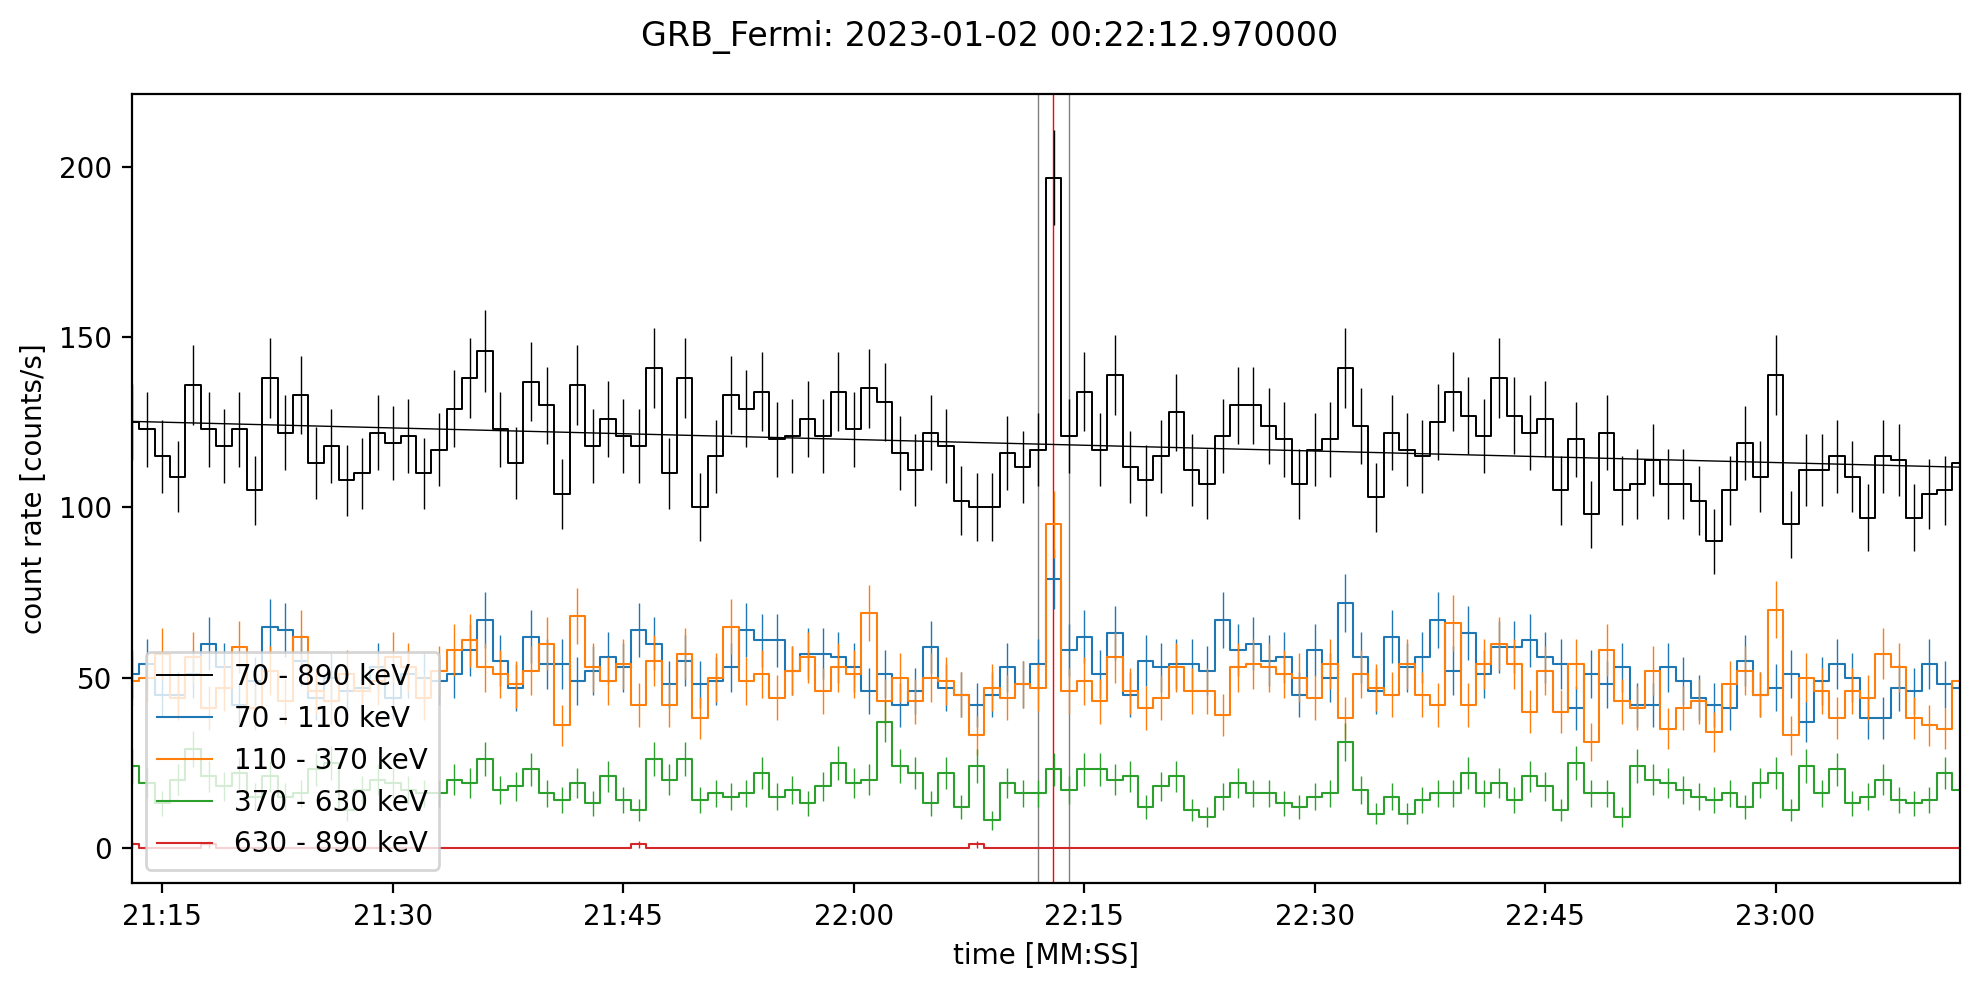

In [6]:
path = r"C:\\Users\\maria\\Desktop\\CubeSats\\GRBs\\files\\r23a01b_36864.json"
time = '2023-01-02 00:22:12.97'
mission = 'Fermi'
obs = Observation(path)
obs.check_event(time,'GRB_'+mission,llim=1,rlim=1,dtvalue=1,fit_function='linear')
ra = 272.8
dec = -35.1
# obs.plot_skymap(time,'GRB_'+mission,ra,dec)